# 💘 Lovely JAX

> After all, you are only human.

::: {.content-visible when-format="markdown"}
## [Read full docs](https://xl0.github.io/lovely-jax) | ❤️ [Lovely Tensors](https://github.com/xl0/lovely-tensors) | 💟 [Lovely `NumPy`](https://github.com/xl0/lovely-numpy) | [Discord](https://discord.gg/4NxRV7NH)
:::

::: {.content-visible when-format="html"}
<h2><a href="https://github.com/xl0/lovely-jax">Source code</a> | ❤️ <a href="https://xl0.github.io/lovely-tensors"> Lovely Tensors</a> | 💟 <a href="https://xl0.github.io/lovely-numpy"> Lovely <tt>NumPy</tt></a> | <a href="https://discord.gg/4NxRV7NH">Discord</a>
</h2>
:::


## Note: I'm pretty new to JAX.
If something does not make sense, shoot me an [Issue](https://github.com/xl0/lovely-jax/issues) and let me know how it's supposed to work!

## Install

```sh
pip install lovely-jax
```

## How to use

In [ ]:
# |hide
import numpy as np
from PIL import Image
import jax, jax.numpy as jnp
from fastcore.test import test_eq

In [ ]:
# |hide
np.set_printoptions(linewidth=120, precision=3)

In [ ]:
# |hide

numbers = jnp.load("mysteryman.npy")
numbers1 = numbers.transpose(1,2,0)

How often do you find yourself debugging JAX code? You dump an array to the cell output, and see this:

In [ ]:
# |hide
import lovely_jax as lj

In [ ]:
# |hide
# A trick to make sure README.md shows the plain version.
lj.monkey_patch()
numbers = numbers.p


In [ ]:
numbers

DeviceArray([[[-0.354, -0.337, -0.405, ..., -0.56 , -0.474,  2.249],
              [-0.405, -0.423, -0.491, ..., -0.919, -0.851,  2.163],
              [-0.474, -0.474, -0.542, ..., -1.039, -1.039,  2.198],
              ...,
              [-0.902, -0.834, -0.936, ..., -1.467, -1.296,  2.232],
              [-0.851, -0.782, -0.936, ..., -1.604, -1.501,  2.18 ],
              [-0.834, -0.816, -0.971, ..., -1.656, -1.553,  2.112]],

             [[-0.197, -0.197, -0.303, ..., -0.478, -0.373,  2.411],
              [-0.25 , -0.232, -0.338, ..., -0.705, -0.67 ,  2.359],
              [-0.303, -0.285, -0.39 , ..., -0.74 , -0.81 ,  2.376],
              ...,
              [-0.425, -0.232, -0.373, ..., -1.09 , -1.02 ,  2.429],
              [-0.39 , -0.232, -0.425, ..., -1.23 , -1.23 ,  2.411],
              [-0.408, -0.285, -0.478, ..., -1.283, -1.283,  2.341]],

             [[-0.672, -0.985, -0.881, ..., -0.968, -0.689,  2.396],
              [-0.724, -1.072, -0.968, ..., -1.247, -1.02 ,  

In [ ]:
# | hide
numbers = numbers1

Was it really useful for you, as a human, to see all these numbers?

What is the shape? The size?\
What are the statistics?\
Are any of the values `nan` or `inf`?\
Is it an image of a man holding a tench?

In [ ]:
import lovely_jax as lj

In [ ]:
lj.monkey_patch()

## `__repr__`

In [ ]:
numbers # torch.Tensor

DeviceArray[196, 196, 3] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073 gpu:0

Better, huh?

In [ ]:
numbers[1,:6,1] # Still shows values if there are not too many.

DeviceArray[6] x∈[-0.408, -0.232] μ=-0.340 σ=0.075 gpu:0 [-0.250, -0.232, -0.338, -0.408, -0.408, -0.408]

In [ ]:
spicy = numbers.flatten()[:12].copy()

spicy = (spicy  .at[0].mul(10000)
                .at[1].divide(10000)
                .at[2].set(float('inf'))
                .at[3].set(float('-inf'))
                .at[4].set(float('nan'))
                .reshape((2,6)))
spicy # Spicy stuff

DeviceArray[2, 6] n=12 x∈[-3.541e+03, -1.975e-05] μ=-393.848 σ=1.180e+03 +Inf! -Inf! NaN! gpu:0

In [ ]:
jnp.zeros((10, 10)) # A zero tensor - make it obvious

DeviceArray[10, 10] all_zeros gpu:0

In [ ]:
spicy.v # Verbose

DeviceArray[2, 6] n=12 x∈[-3.541e+03, -1.975e-05] μ=-393.848 σ=1.180e+03 +Inf! -Inf! NaN! gpu:0
DeviceArray([[-3.541e+03, -1.975e-05,        inf,       -inf,        nan, -9.853e-01],
             [-4.054e-01, -3.025e-01, -8.807e-01, -4.397e-01, -3.025e-01, -7.761e-01]], dtype=float32)

In [ ]:
spicy.p # The plain old way

DeviceArray([[-3.541e+03, -1.975e-05,        inf,       -inf,        nan, -9.853e-01],
             [-4.054e-01, -3.025e-01, -8.807e-01, -4.397e-01, -3.025e-01, -7.761e-01]], dtype=float32)

## Going `.deeper`

In [ ]:
numbers.deeper

DeviceArray[196, 196, 3] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073 gpu:0
  DeviceArray[196, 3] n=588 x∈[-1.912, 2.411] μ=-0.728 σ=0.519 gpu:0
  DeviceArray[196, 3] n=588 x∈[-1.861, 2.359] μ=-0.778 σ=0.450 gpu:0
  DeviceArray[196, 3] n=588 x∈[-1.758, 2.379] μ=-0.838 σ=0.437 gpu:0
  DeviceArray[196, 3] n=588 x∈[-1.656, 2.466] μ=-0.878 σ=0.415 gpu:0
  DeviceArray[196, 3] n=588 x∈[-1.717, 2.448] μ=-0.882 σ=0.399 gpu:0
  DeviceArray[196, 3] n=588 x∈[-1.717, 2.431] μ=-0.905 σ=0.408 gpu:0
  DeviceArray[196, 3] n=588 x∈[-1.563, 2.448] μ=-0.859 σ=0.416 gpu:0
  DeviceArray[196, 3] n=588 x∈[-1.475, 2.431] μ=-0.791 σ=0.463 gpu:0
  DeviceArray[196, 3] n=588 x∈[-1.526, 2.429] μ=-0.759 σ=0.499 gpu:0
  ...

In [ ]:
# You can go deeper if you need to
numbers[:3,:5,:3].deeper(2)

DeviceArray[3, 5, 3] n=45 x∈[-1.316, -0.197] μ=-0.593 σ=0.302 gpu:0
  DeviceArray[5, 3] n=15 x∈[-0.985, -0.197] μ=-0.491 σ=0.267 gpu:0
    DeviceArray[3] x∈[-0.672, -0.197] μ=-0.408 σ=0.197 gpu:0 [-0.354, -0.197, -0.672]
    DeviceArray[3] x∈[-0.985, -0.197] μ=-0.507 σ=0.343 gpu:0 [-0.337, -0.197, -0.985]
    DeviceArray[3] x∈[-0.881, -0.303] μ=-0.530 σ=0.252 gpu:0 [-0.405, -0.303, -0.881]
    DeviceArray[3] x∈[-0.776, -0.303] μ=-0.506 σ=0.199 gpu:0 [-0.440, -0.303, -0.776]
    DeviceArray[3] x∈[-0.916, -0.215] μ=-0.506 σ=0.298 gpu:0 [-0.388, -0.215, -0.916]
  DeviceArray[5, 3] n=15 x∈[-1.212, -0.232] μ=-0.609 σ=0.302 gpu:0
    DeviceArray[3] x∈[-0.724, -0.250] μ=-0.460 σ=0.197 gpu:0 [-0.405, -0.250, -0.724]
    DeviceArray[3] x∈[-1.072, -0.232] μ=-0.576 σ=0.360 gpu:0 [-0.423, -0.232, -1.072]
    DeviceArray[3] x∈[-0.968, -0.338] μ=-0.599 σ=0.268 gpu:0 [-0.491, -0.338, -0.968]
    DeviceArray[3] x∈[-0.968, -0.408] μ=-0.651 σ=0.235 gpu:0 [-0.577, -0.408, -0.968]
    DeviceArray[3] x∈[-1

In [ ]:
# __tracebackhide__=False

# def f(x):
#     __tracebackhide__=False

#     jax.debug.print(" sdfs {x} sfsdf", x=x)
#     jax.debug.print(" sdfs {x} sfsdf", x=type(x))
#     return x*2

# fj = jax.jit(f)

# _ = fj(numbers)


# # print(numbers)

In [ ]:
print(repr(numbers))

DeviceArray[196, 196, 3] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073 gpu:0


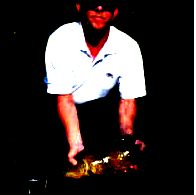

In [ ]:
# |hide

numbers.rgb

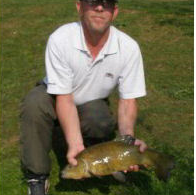

In [ ]:
# |hide

in_stats = ( (0.485, 0.456, 0.406),     # mean 
             (0.229, 0.224, 0.225) )    # std

# numbers.rgb(in_stats, cl=False) # For channel-first input format
numbers.rgb(in_stats)

In [ ]:
# |hide

# torch.manual_seed(42) # For reproducibility of flots, otherwise we updatem the images in git every time.

In [ ]:
# |hide

# (numbers+3).plt

In [ ]:
# |hide

# (numbers+3).plt(center="mean", max_s=1000)

In [ ]:
# |hide


# (numbers+3).plt(center="range")

In [ ]:
# |hide

# .chans will map values betwen [0,1] to colors.
# Make our values fit into that range to avoid clipping.
# mean = torch.tensor(in_stats[0])[:,None,None]
# std = torch.tensor(in_stats[1])[:,None,None]
# numbers_01 = (numbers*std + mean)
# numbers_01

In [ ]:
# |hide
# |eval: false

# numbers_01.chans

In [ ]:
# |hide
# |eval: false


# |eval: false
# from torchvision.models import vgg11

In [ ]:
# |hide
# |eval: false

# features = vgg11().features

# Note: I only saved the first 5 layers in "features.pt"
# _ = features.load_state_dict(torch.load("../features.pt"), strict=False)

In [ ]:
# |hide
# |eval: false

# Activatons of the second max pool layer of VGG11

# print(features[5])

# acts = (features[:6](numbers[None])[0]/2) # /2 to reduce clipping
# acts

In [ ]:
# |hide
# |eval: false

# acts.chans

## Without `monkey_patch()`

In [ ]:
lj.lovely(spicy)

DeviceArray[2, 6] n=12 x∈[-3.541e+03, -1.975e-05] μ=-393.848 σ=1.180e+03 +Inf! -Inf! NaN! gpu:0

In [ ]:
lj.lovely(spicy, verbose=True)

DeviceArray[2, 6] n=12 x∈[-3.541e+03, -1.975e-05] μ=-393.848 σ=1.180e+03 +Inf! -Inf! NaN! gpu:0
DeviceArray([[-3.541e+03, -1.975e-05,        inf,       -inf,        nan, -9.853e-01],
             [-4.054e-01, -3.025e-01, -8.807e-01, -4.397e-01, -3.025e-01, -7.761e-01]], dtype=float32)

In [ ]:
lj.lovely(numbers, depth=1)

DeviceArray[196, 196, 3] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073 gpu:0
  DeviceArray[196, 3] n=588 x∈[-1.912, 2.411] μ=-0.728 σ=0.519 gpu:0
  DeviceArray[196, 3] n=588 x∈[-1.861, 2.359] μ=-0.778 σ=0.450 gpu:0
  DeviceArray[196, 3] n=588 x∈[-1.758, 2.379] μ=-0.838 σ=0.437 gpu:0
  DeviceArray[196, 3] n=588 x∈[-1.656, 2.466] μ=-0.878 σ=0.415 gpu:0
  DeviceArray[196, 3] n=588 x∈[-1.717, 2.448] μ=-0.882 σ=0.399 gpu:0
  DeviceArray[196, 3] n=588 x∈[-1.717, 2.431] μ=-0.905 σ=0.408 gpu:0
  DeviceArray[196, 3] n=588 x∈[-1.563, 2.448] μ=-0.859 σ=0.416 gpu:0
  DeviceArray[196, 3] n=588 x∈[-1.475, 2.431] μ=-0.791 σ=0.463 gpu:0
  DeviceArray[196, 3] n=588 x∈[-1.526, 2.429] μ=-0.759 σ=0.499 gpu:0
  ...

In [ ]:
# |hide

#lj.rgb(numbers, in_stats)

In [ ]:
# |hide
# torch.manual_seed(42) # For reproducibility of flots, otherwise we updatem the images in git every time.

In [ ]:
# |hide

# lt.plot(numbers, center="mean")

In [ ]:
# |hide

# lt.chans(numbers_01)